In [1]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
model=tf.keras.models.load_model(r"E:\Projects\Emotion Detector\Models\final.h5")

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 batch_normalization (Batch  (None, 7, 7, 2048)        8192      
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [4]:
hc=cv.CascadeClassifier('faces.xml')

In [5]:
img='E:\Projects\Emotion Detector\Datasets\testing\surprised1.jpg'

In [6]:
img=cv.imread(r'E:\Projects\Emotion Detector\Datasets\testing\surprised1.jpg')

In [7]:
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [8]:
faces=hc.detectMultiScale(img,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv.CASCADE_SCALE_IMAGE)

In [9]:
 for (x,y,w,h) in faces:
            cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            face=img[y:y+h,x:x+w]
            face=cv.resize(face,(224,224))
            face=face.astype('float')/255.0
            face=np.array(face)

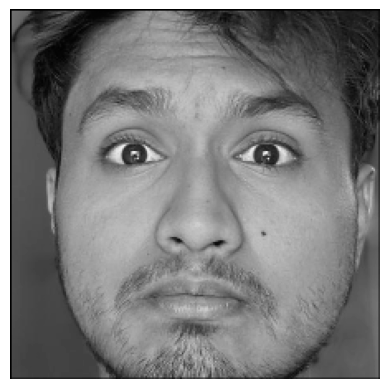

In [10]:
plt.imshow(face,cmap='gray')
plt.axis('off')
plt.show()

In [11]:
face.shape

(224, 224)

In [12]:
face=np.expand_dims(face,axis=0)

In [13]:
expanded_image = np.expand_dims(face, axis=-1)

In [14]:
output_image_rgb = np.concatenate([expanded_image, expanded_image, expanded_image], axis=-1)

In [15]:
np.argmax(model.predict(output_image_rgb))

1/1 [==============================] - 1s 880ms/step


6

In [16]:
emotion_label={0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}

In [17]:
emotion_label[6]

'surprise'

In [18]:
from ipywidgets import widgets
import threading
import subprocess
import IPython.display as ipd
from IPython.display import Image, display

In [19]:
stopButton=widgets.ToggleButton(value=False,description='STOP',button_style='danger',ttoltip='Description',icon='square')

In [20]:
def view(button):
    cap=cv.VideoCapture(0)
    display_handle=display(None,display_id=True)
    i=0
    while True:
        _,frame=cap.read()
        #frame=cv.flip(frame,1)
        gray=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
        faces=hc.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv.CASCADE_SCALE_IMAGE)
        
        for (x,y,w,h) in faces:
            cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
            face=gray[y:y+h,x:x+w]
            face=cv.resize(face,(224,244))
            face=face.astype('float')/255.0
            face=np.array(face)
            face=np.expand_dims(face,axis=0)
            
            pred=np.argmax(model.predict(face)[0])
            emotion=emotion_label[pred]
            
            cv.putText(frame,emotion,(x,y-10),cv.FONT_HERSHEY_SIMPLEX,0.9,(122,122,122),2)
            
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)
            
    cap.release()
    cv.destroyAllWindows()

In [21]:
display(stopButton)
thread=threading.Thread(target=view,args=(stopButton,))
thread.start()

ToggleButton(value=False, button_style='danger', description='STOP', icon='square')

None